In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
#from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


In [3]:
from imblearn.over_sampling import SMOTE


In [59]:
df = pd.read_csv('personal1/Training Data.csv')


In [5]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [60]:
df.drop(columns =["Id"],inplace=True)

In [7]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [9]:
df.shape

(252000, 12)

In [10]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [11]:
df.isnull().any()

Income               False
Age                  False
Experience           False
Married/Single       False
House_Ownership      False
Car_Ownership        False
Profession           False
CITY                 False
STATE                False
CURRENT_JOB_YRS      False
CURRENT_HOUSE_YRS    False
Risk_Flag            False
dtype: bool

In [12]:
df['Married/Single'].unique()


array(['single', 'married'], dtype=object)

In [13]:
df['CITY'].unique()


array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [14]:
df['STATE'].unique()


array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [15]:
df['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [16]:
df['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


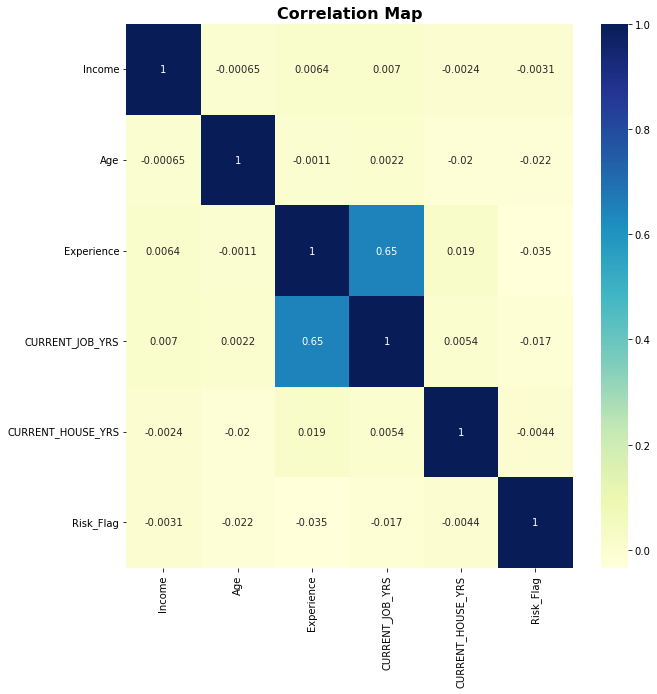

In [18]:
Cor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


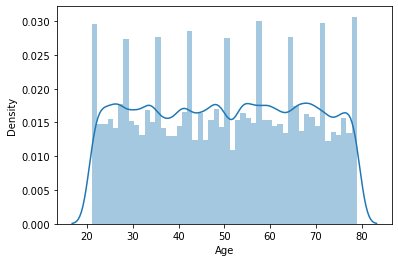

In [19]:
sns.distplot(a=df["Age"]);


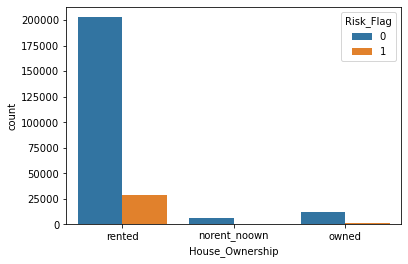

In [20]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df);

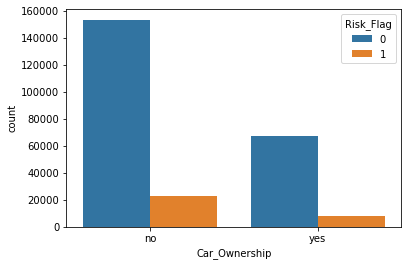

In [21]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df);

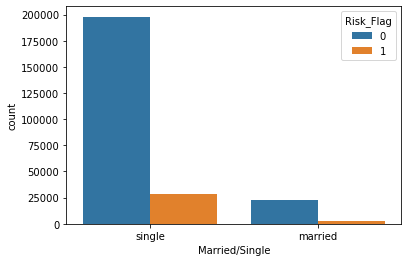

In [22]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df);

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


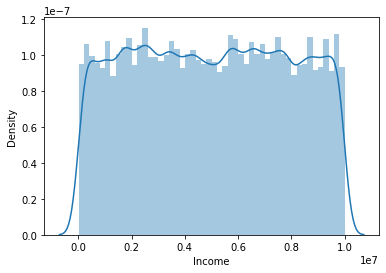

In [23]:
sns.distplot(a=df["Income"]);


Text(0, 0.5, 'Income')

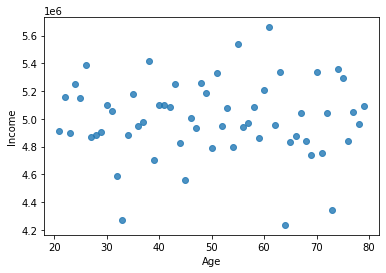

In [24]:
#income based on the age?
q=df.groupby('Age', as_index=False)['Income'].mean()
q.Income= round (q.Income,1)

sns.regplot(data = q, x = 'Age', y = 'Income', fit_reg = False)

plt.xlabel('Age');
plt.ylabel('Income')

Text(0, 0.5, 'Experience')

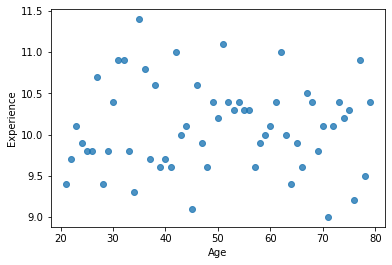

In [25]:
#experience according to the age?
w= df.groupby('Age', as_index=False)['Experience'].mean()
w.Experience= round (w.Experience,1)

sns.regplot(data = w, x = 'Age', y = 'Experience', fit_reg = False)

plt.xlabel('Age');
plt.ylabel('Experience')

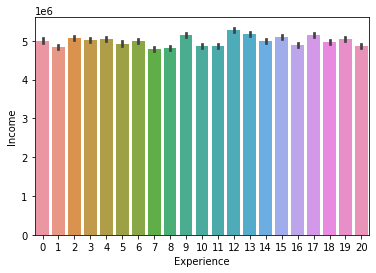

In [26]:
#income based on the experience?
sns.barplot(x ='Experience', y ='Income', data = df)
plt.show()

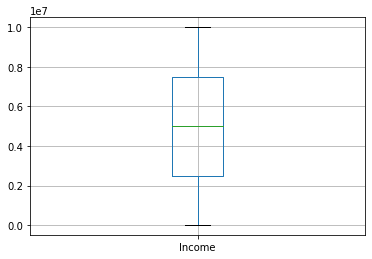

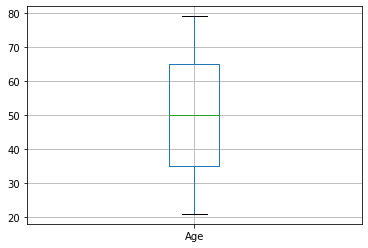

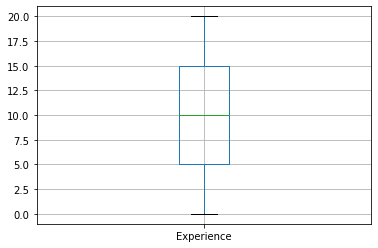

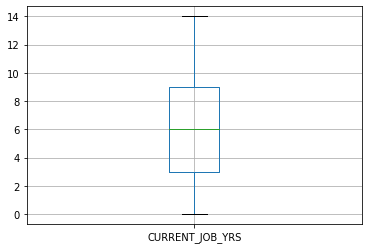

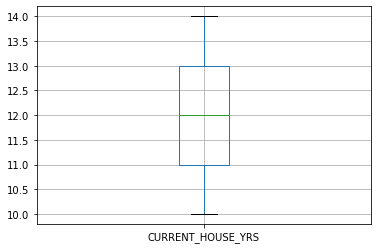

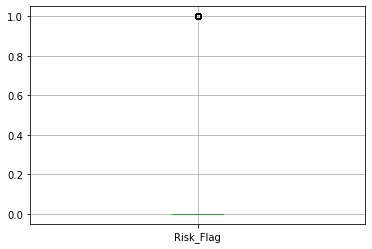

In [27]:
for column in df._get_numeric_data():
    plt.figure()
    df.boxplot([column])


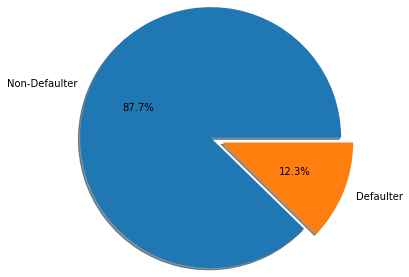

In [28]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

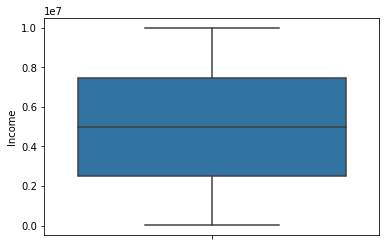

In [29]:
sns.boxplot(y = 'Income', data = df);


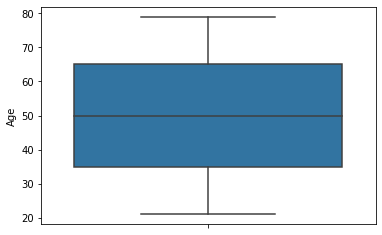

In [30]:
sns.boxplot(y = 'Age', data = df);


Class 0 represents 88.00% of the dataset, while class 1 only 12.00%. The classes are heavily skewed we need to solve this issue
There are no outliers in datasets. But we need to scale Age and Income
Strong correlation between Experience and CURRENT_JOB_YRS May drop one column during feature selection process or use Principal Component Analysis (PCA)
Married/Single House_Ownership Car_Ownership can be binarised or one-hot encoded
We can find the relationship between target variable and categorical variable using Chi-square test

In [ ]:
#sns.heatmap(df.corr(), annot=True)

In [31]:
df['Risk_Flag'].value_counts()


0    221004
1     30996
Name: Risk_Flag, dtype: int64

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

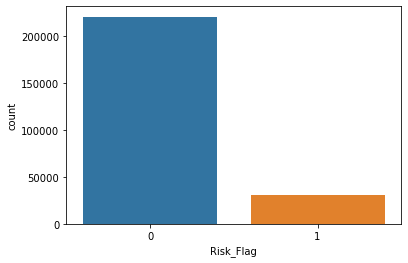

In [32]:
sns.countplot(data=df, x='Risk_Flag')


<AxesSubplot:xlabel='Married/Single', ylabel='count'>

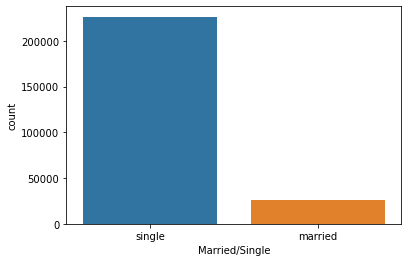

In [33]:
sns.countplot(data=df, x='Married/Single')


<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

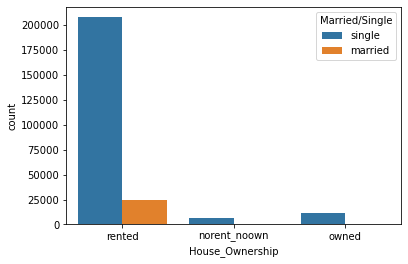

In [34]:
sns.countplot(data=df, x='House_Ownership', hue='Married/Single')


<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

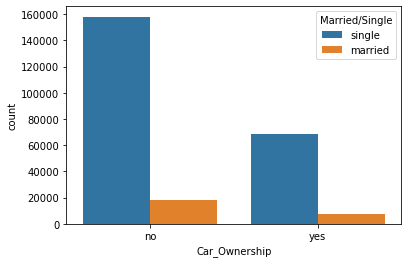

In [35]:
sns.countplot(data=df, x='Car_Ownership', hue='Married/Single')


<AxesSubplot:xlabel='count', ylabel='Profession'>

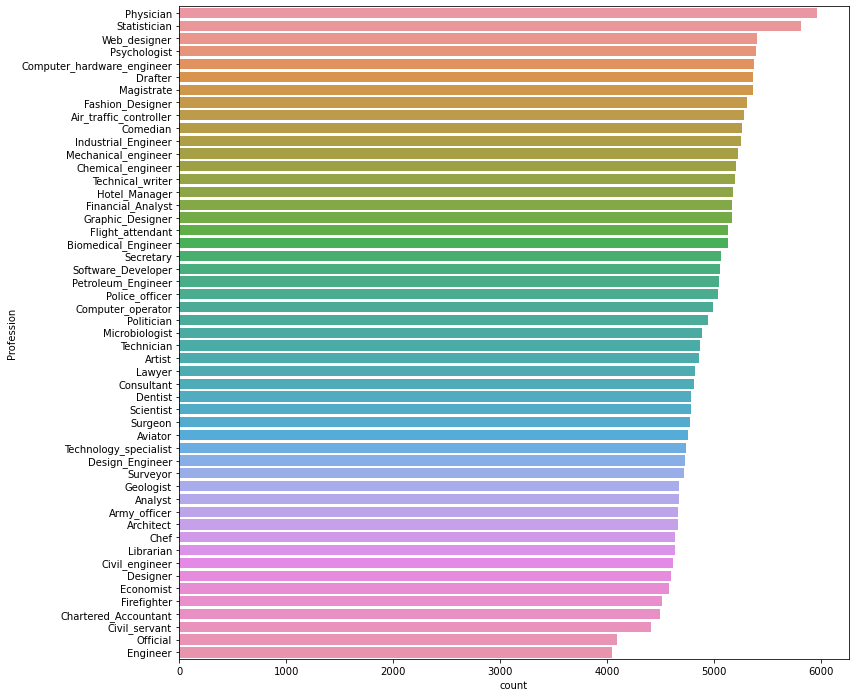

In [36]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, y='Profession', order=df['Profession'].value_counts().index)

<AxesSubplot:xlabel='Income', ylabel='Count'>

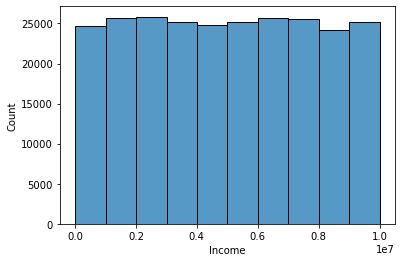

In [37]:
sns.histplot(df['Income'], bins=10)


<AxesSubplot:xlabel='Married/Single', ylabel='count'>

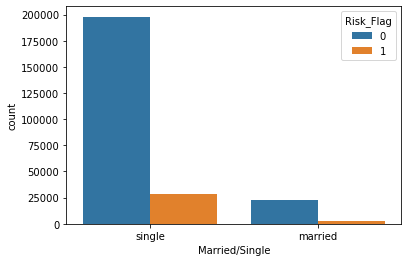

In [38]:
sns.countplot(data=df, x='Married/Single', hue='Risk_Flag')


In [39]:
def chi_square_test(data):
    stat, p, dof, expected = chi2_contingency(car_ownership_risk_flag)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

In [40]:
car_ownership_risk_flag = pd.crosstab(df["Car_Ownership"], df["Risk_Flag"])
car_ownership_risk_flag


Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [41]:
chi_square_test(car_ownership_risk_flag)


p value is 1.7350853850183746e-33
Dependent (reject H0)


In [42]:
marital_status_risk_flag = pd.crosstab(df["Married/Single"], df["Risk_Flag"])
marital_status_risk_flag


Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [43]:
chi_square_test(marital_status_risk_flag)


p value is 1.7350853850183746e-33
Dependent (reject H0)


In [44]:
house_ownership_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"])
house_ownership_risk_flag


Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [45]:
chi_square_test(house_ownership_risk_flag)

p value is 1.7350853850183746e-33
Dependent (reject H0)


In [46]:
city_risk_flag = pd.crosstab(df["CITY"], df["Risk_Flag"])
city_risk_flag


Risk_Flag,0,1
CITY,,
Adoni,850,103
Agartala,673,136
Agra,931,81
Ahmedabad,516,133
Ahmednagar,607,38
...,...,...
Vijayanagaram,1110,149
Vijayawada,1025,147
Visakhapatnam[4],830,141


In [47]:
chi_square_test(house_ownership_risk_flag)

p value is 1.7350853850183746e-33
Dependent (reject H0)


In [48]:
df.drop(columns =["CITY","Car_Ownership","Experience"],inplace=True)

In [49]:
df.head()

,Income,Age,Married/Single,House_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,single,rented,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,single,rented,Software_Developer,Maharashtra,9,13,0
2,3991815,66,married,rented,Technical_writer,Kerala,4,10,0
3,6256451,41,single,rented,Software_Developer,Odisha,2,12,1
4,5768871,47,single,rented,Civil_servant,Tamil_Nadu,3,14,1


In [50]:
features = ['Married/Single','Profession','STATE']
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])

In [51]:
df1 = pd.get_dummies(df, columns = ["House_Ownership"])

In [52]:
X = df1.drop(['Risk_Flag'],axis=1)
y = df1.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [53]:
X_train.shape, y_train.shape

((176400, 10), (176400,))

In [54]:
X_test.shape, y_test.shape

((75600, 10), (75600,))

In [55]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [56]:
model = XGBClassifier(learning_rate=0.1,n_estimators=1000,use_label_encoder=False,random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

[22:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8796825396825397

In [57]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.77     75600
weighted avg       0.91      0.88      0.89     75600



In [58]:
X_train

,Income,Age,Married/Single,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
157193,5421595,45,1,0,10,4,12,0,0,1
125307,7585042,53,1,35,7,3,13,0,0,1
102075,3319389,35,1,17,19,5,11,0,0,1
235132,3880165,33,1,3,25,1,11,0,0,1
13524,2729670,23,1,3,23,10,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...
176963,9422918,77,1,42,14,9,13,0,0,1
117952,7716196,27,1,33,5,5,14,0,0,1
173685,2557871,55,1,6,1,3,12,0,0,1
43567,8914067,77,1,20,5,10,11,0,0,1


In [68]:
df.drop(columns =["CITY","Car_Ownership"],inplace=True)

In [69]:
features = ['Married/Single','Profession','STATE']
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])

In [70]:
df1 = pd.get_dummies(df, columns = ["House_Ownership"])

In [71]:
df1.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'Profession', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag',
       'House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented'],
      dtype='object')

In [72]:
X = df1.drop(['Risk_Flag'],axis=1)
y = df1.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [73]:
X_train

,Income,Age,Experience,Married/Single,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
157193,5421595,45,4,1,0,10,4,12,0,0,1
125307,7585042,53,15,1,35,7,3,13,0,0,1
102075,3319389,35,5,1,17,19,5,11,0,0,1
235132,3880165,33,1,1,3,25,1,11,0,0,1
13524,2729670,23,10,1,3,23,10,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
176963,9422918,77,11,1,42,14,9,13,0,0,1
117952,7716196,27,5,1,33,5,5,14,0,0,1
173685,2557871,55,14,1,6,1,3,12,0,0,1
43567,8914067,77,18,1,20,5,10,11,0,0,1


In [74]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [75]:
model = XGBClassifier(learning_rate=0.1,n_estimators=1000,use_label_encoder=False,random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

[22:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8806746031746032

In [76]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



X.columns

y = df["Risk_Flag"]
X = df.drop("Risk_Flag",axis = 1)


In [ ]:
xgbc = XGBClassifier()


In [ ]:
xgbc.fit(X_train, y_train)


In [ ]:
y_pred = xgbc.predict(X_test)


In [ ]:
confusion_matrix(y_pred, y_test)


In [ ]:
accuracy_score(y_pred, y_test)
